## What is Classification

Classification in machine learning refers to the process of categorizing input data into predefined classes or categories. The primary goal is to develop a model that can accurately predict the class of new, unseen instances based on the patterns learned from a training data.

Key elements of classification task include:

1. **Classes or Categories:**
   - These are the distinct labels or groups into which the data is categorized. In binary classification, there are two classes (e.g., **yes/no**, **positive/negative**), while in multiclass classification, there are more than two classes.

2. **Features:**
   - Features are the characteristics or attributes of the data that the model uses for training and making predictions. These could be numerical, categorical, or a combination of both.

3. **Training Data:**
   - The algorithm is trained on a labeled data, where each example has input features and a corresponding class label. The model learns the **relationships between features and the categories in the target**.

4. **Model:**
   - The model is a mathematical representation of the learned relationships. Common classification models include logistic regression, support vector machines, decision trees, k-nearest neighbors, and neural networks.

5. **Prediction:**
   - Once trained, the model can be used to predict the categories of new, unseen instances. The model generalizes the relationship in the training data to make predictions on data it has not encountered during training.

6. **Evaluation Metrics:**
   - Various metrics are used to assess the performance of a classification model, such as accuracy, precision, recall, F1 score, confusion matrix, ROC-AUC. The choice of metrics depends on the specific requirements and characteristics of the problem.

Classification tasks can be broadly categorized into two types:

- **Binary Classification:** The problem involves predicting one of two classes. Examples include spam detection (yes or no) or credit card default prediction (yes or no).

- **Multiclass Classification:** The problem involves predicting one of more than two classes. Examples include image recognition (identifying objects in images) or handwritten digit recognition, cancer risk level prediction(low,medium,high).

## Credit Card Default Prediction

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
url = 'https://drive.google.com/file/d/1wE1PYE9P9c-cXymmu4rgYpf0hhoDn1M_/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

HTTPError: HTTP Error 404: Not Found

In [3]:
df['target']=df['default'].apply(lambda x: 1 if x=='yes' else 0)
df.sample(10)


NameError: name 'df' is not defined

The target coloum is the encoding of default, where yes is 1 and no is 0. This gives a numerical column

In classification problem, instead of predicting the classes, the model predicts the probabity of the items belonging to the classes. Because probabilities are numbers, we might wonder if we can use a regression model to predict them. But in this case, it's not the best idea. Why?

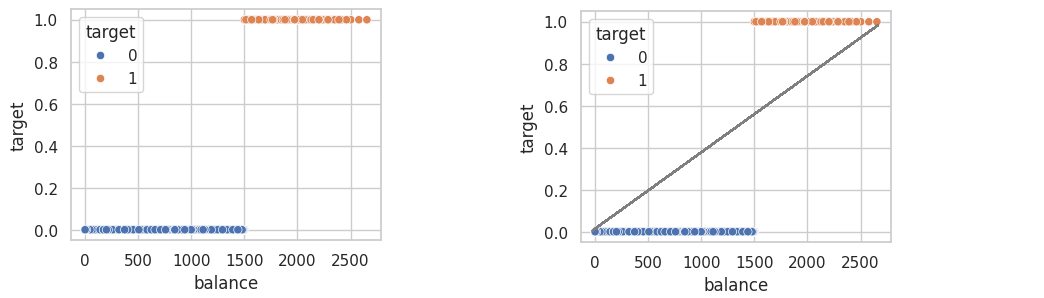

## Sigmoid Function & Logistic Regression

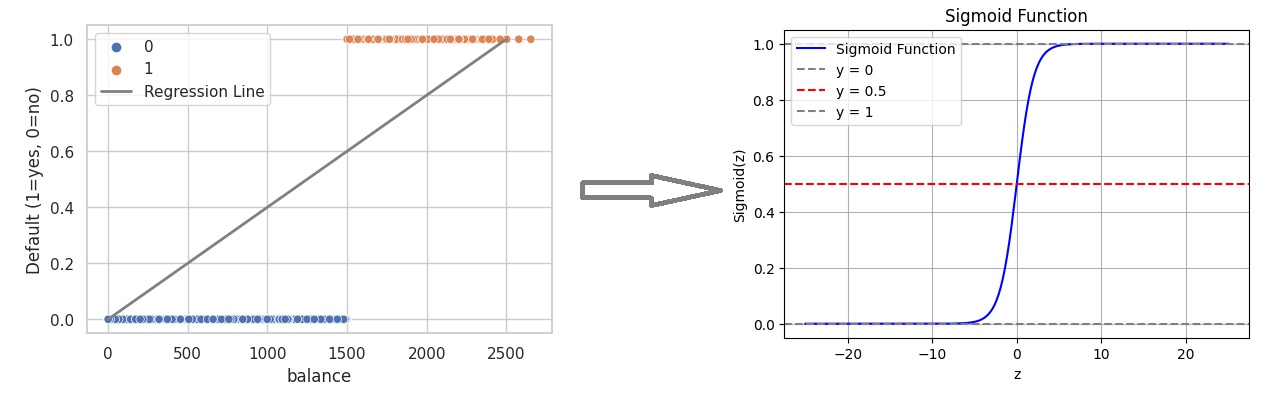

The sigmoid function, also known as the logistic function, is a widely used mathematical function that maps any real-valued number to a value in the range of 0 to 1. It is named "sigmoid" due to its S-shaped curve when plotted, and it is represented by the symbol $\sigma(z)$. The sigmoid function is defined by the formula:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

In this equation, $z$ represents the input value, and $e$ denotes Euler's number, which is approximately equal to 2.71828.

Key characteristics of the sigmoid function:

1. **S-Shaped Curve:** The sigmoid function has an S-shaped curve that resembles an "S" or an elongated "C" when graphed. It starts near 0 for large negative values of $z$, approaches 0.5 at $z = 0$, and approaches 1 for large positive values of $z$.

2. **Range [0, 1]:** The output of the sigmoid function is always within the closed interval [0, 1], making it particularly useful for tasks involving probability, where values between 0 and 1 are needed.

<h3>The Logisitic Regression Model:

$$ \frac{1}{1 + e^{-(\beta_0 + \beta_1 * balance)}}$$

This is the logistic regression prediction formula that gives us the probability of the instance belonging to the positive class. The parameters $ \beta_0, \beta_1$ are estimated during the training process to best fit the data. During prediction, the value of sigmoid function is used to make a binary classification decision.

### Loss Function (optional)


In logistic regression, the loss function commonly used is the logistic loss function, also known as the cross-entropy loss or log loss. It is derived from the principle of maximum likelihood estimation.

Given a binary classification problem where the target variable $ y $ takes values either 0 or 1, and the predicted probability for class 1 is $ \hat{y} $, the logistic loss function is defined as:

$ \text{Logistic Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $

Where:
- $ N $ is the number of samples in the dataset.
- $ y_i $ is the true label for the $ i $th sample.
- $ \hat{y}_i $ is the predicted probability that the $ i $th sample belongs to class 1.

The logistic loss function penalizes the model proportionally to the difference between the predicted probability and the actual label. If the predicted probability is close to the true label, the loss is small; otherwise, the loss increases. The goal during training is to minimize this loss function, typically achieved through optimization algorithms like gradient descent.

### Code

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Selecting features and target variable
X = df[['balance']]
y = df['target']

# Performing the train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [5]:
logreg_model.predict_proba([[1500]])

array([[0.4172675, 0.5827325]])

In [6]:
logreg_model.predict([[1500]])

array([1])

## Evaluation

Accuracy is a common evaluation metric used in classification tasks to measure the overall correctness of predictions made by a model. It is defined as the ratio of correctly predicted instances to the total number of instances in the dataset. The formula for accuracy is:

$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $

### Code

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)

Accuracy: 1.0


In [8]:
y_test.shape

(2000,)

### Confusion Matrix

The accuracy is:  0.8


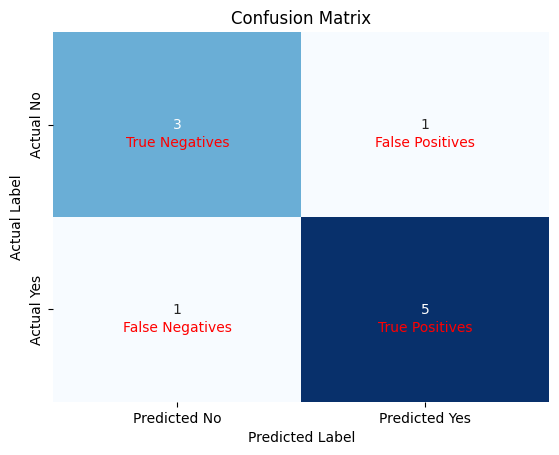

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
y_true = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
y_pred = [1, 0, 1, 1, 1, 0, 0, 1, 0, 1]

# Calculate the accuracy
accuracy=accuracy = accuracy_score(y_true, y_pred)
print("The accuracy is: ",accuracy)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Creating a heatmap using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'],cbar=False)

# Adding text annotations
plt.text(0.5, 0.6, 'True Negatives', ha='center', va='center', color='red')
plt.text(1.5, 1.6, 'True Positives', ha='center', va='center', color='red')

plt.text(1.5, 0.6, 'False Positives', ha='center', va='center', color='red')
plt.text(0.5, 1.6, 'False Negatives', ha='center', va='center', color='red')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

A confusion matrix is a table that is used to evaluate the performance of a classification model. It provides a detailed breakdown of the model's predictions, showing the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) instances. The confusion matrix is especially useful in binary classification problems but can be extended to multiclass classification as well.

Here are the key components of a confusion matrix:

- **True Positive (TP):** When the instance is positive, the model predicts positive.
  - Definition: The model correctly predicts that a given instance belongs to the positive class (e.g., credit card default), and indeed, the instance is positive. The model's prediction aligns with the actual positive nature of the instance.
  - In the context of credit card default prediction:
    - **Positive Instance:** A credit card account defaults.
    - **Model Prediction:** The model correctly predicts that the credit card account defaults.

- **True Negative (TN):** When the instance is negative, the model predicts negative.
  - Definition: The model correctly predicts that a given instance belongs to the negative class (e.g., no credit card default), and indeed, the instance is negative. The model's prediction aligns with the actual negative nature of the instance.
  - In the context of credit card default prediction:
    - **Negative Instance:** A credit card account does not default.
    - **Model Prediction:** The model correctly predicts that the credit card account does not default.

- **False Positive (FP):** When the instance is negative, but the model predicts positive.
  - Definition: The model incorrectly predicts that a given instance belongs to the positive class (e.g., credit card default), but the instance is actually negative. The model's prediction contradicts the actual negative nature of the instance.
  - In the context of credit card default prediction:
    - **Negative Instance:** A credit card account does not default.
    - **Model Prediction:** The model incorrectly predicts that the credit card account defaults.

- **False Negative (FN):** When the instance is positive, but the model predicts negative.
  - Definition: The model incorrectly predicts that a given instance belongs to the negative class (e.g., no credit card default), but the instance is actually positive. The model's prediction contradicts the actual positive nature of the instance.
  - In the context of credit card default prediction:
    - **Positive Instance:** A credit card account defaults.
    - **Model Prediction:** The model incorrectly predicts that the credit card account does not default.

**Key Metrics Derived from the Confusion Matrix:**

1. **Accuracy:**
   - $ \text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}} $
   - Measures the overall correctness of predictions.

2. **Precision (Positive Predictive Value):**
   - $ \text{Precision} = \frac{\text{TP}}{\text{TP + FP}} $
   - Proportion of true positive predictions among **all positive predictions**.
   - It answers the question: **"Of all the instances predicted as positive, how many are actually positive?"** Therefore, a precision score close to 1.0 indicates the model's high accuracy in identifying positive instances, making it highly reliable for predicting positive classes. On the other hand, a precision score closer to 0 suggests that the model is making a significant number of false positive errors, incorrectly labeling negative instances as positive.

3. **Recall (Sensitivity, True Positive Rate):**
   - $ \text{Recall} = \frac{\text{TP}}{\text{TP + FN}} $
   - Proportion of true positive predictions among **all actual positives**.
   - It answers the question: **"Of all the actual positive instances, how many did the model correctly identify?"**

4. **F1 Score:**
   - $ \text{F1 Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision + Recall}} $
   - Combines both precision and recall into a single value
   - Ranges from 0 to 1, with 1 indicating perfect precision and recall, and 0 indicating poor performance in either precision or recall.
   - Harmonic mean of precision and recall.

Here are some reasons why the F1 score is useful:

1. **Balancing Precision and Recall:** F1 score considers both false positives (precision) and false negatives (recall), providing a balanced assessment of a model's performance. In scenarios where the cost of false positives and false negatives is significant, F1 score is a valuable metric.

2. **Handling Class Imbalance:** In datasets where one class is significantly more prevalent than the other, accuracy alone may be misleading. The F1 score is robust to class imbalance because it considers false positives and false negatives proportionately.

3. **Single Metric Evaluation:** F1 score provides a single metric that summarizes a model's performance, making it easier to compare and evaluate models. This is especially helpful when dealing with multiple models or iterations.

4. **Trade-off Analysis:** F1 score helps in analyzing the trade-off between precision and recall. Depending on the specific problem or application, one might be more important than the other. F1 score provides a way to balance these considerations.

While the F1 score is a useful metric, it's important to note that it might not be the best choice in all situations. In some cases, precision, recall, or accuracy alone may be more relevant depending on the specific goals and requirements of the task at hand. Therefore, it's advisable to consider multiple metrics and the specific context of the problem when evaluating model performance.

### F1 score

In [9]:
from sklearn.metrics import f1_score

y_true = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
y_pred = [1, 0, 1, 1, 1, 0, 0, 1, 0, 1]

# Calculate the F1 score
f1 = f1_score(y_true, y_pred)

# Display the F1 score
print("F1 Score:", f1)

F1 Score: 0.8333333333333334


## Additional Resources

#### Harmonic Mean
The harmonic mean is a type of average that is calculated by dividing the number of observations by the reciprocal of each number in the series, and then taking the reciprocal of the result. Mathematically, for a set of $n$ positive numbers $x_1, x_2, \ldots, x_n$, the harmonic mean $H$ is calculated as follows:

$H = \frac{n}{\frac{1}{x_1} + \frac{1}{x_2} + \ldots + \frac{1}{x_n}}$

In the context of the F1 score, the harmonic mean is applied to the precision and recall values. For precision $P$ and recall $R$, the harmonic mean $F1$ is calculated as:

$\ F1 = \frac{2 \times P \times R}{P + R} \$

The harmonic mean is particularly useful in situations where extreme values (in this case, either very low precision or very low recall) should have a strong influence on the overall result. It tends to give more weight to lower values in the series compared to the arithmetic mean. In the case of the F1 score, the harmonic mean helps balance precision and recall, making it a suitable metric for evaluating the performance of a classifier in situations where both false positives and false negatives are important considerations.